In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# url = "https://drive.google.com/uc?export=download&id=1XR8j4T3tt2vS9u-w-1GZ5rdyzTl6qkiS"
dataFrame = pd.read_csv("exoplanet_dataset (4).csv")
dataFrame.head()

,id,name,distance_from_star (ly),planet_size (Earth masses),temperature (K),atmosphere,star_type,orbital_period (days),surface_pressure (atm),presence_of_liquid_water (0/1),habitability,gravity (m/s^2),planet_age (billion years),metallicity,solar_flare_activity,day_length (hours),surface_gravity_ratio
0,1,ExoPlanet-1,10.0,1.00,250.0,Earth-like,M-dwarf,30.0,0.50,1,1,9.80,4.50,0.50,low,24.0,1.00
1,3,ExoPlanet-3,10.2,1.04,251.0,Thick atmosphere,M-dwarf,31.0,0.52,1,1,9.84,4.52,0.52,high,24.1,1.04
2,5,ExoPlanet-5,10.4,1.08,252.0,Thin atmosphere,M-dwarf,32.0,0.54,1,1,9.88,4.54,0.54,medium,24.2,1.08
3,7,ExoPlanet-7,10.6,1.12,253.0,Earth-like,M-dwarf,33.0,0.56,1,1,9.92,4.56,0.56,low,24.3,1.12
4,9,ExoPlanet-9,10.8,1.16,254.0,Thick atmosphere,M-dwarf,34.0,0.58,1,1,9.96,4.58,0.58,high,24.4,1.16


In [ ]:
x = dataFrame[['distance_from_star (ly)', 'planet_size (Earth masses)', 'temperature (K)',
               'atmosphere', 'star_type', 'orbital_period (days)', 'surface_pressure (atm)',
               'gravity (m/s^2)', 'planet_age (billion years)', 'metallicity',
               'solar_flare_activity', 'day_length (hours)', 'surface_gravity_ratio']]
y = dataFrame['habitability']

# Create a DataFrame for Regression Analysis
regressionDataFrame = pd.DataFrame({
    'distance_from_star (ly)': x['distance_from_star (ly)'],
    'planet_size (Earth masses)': x['planet_size (Earth masses)'],
    'temperature (K)': x['temperature (K)'],
    'atmosphere': x['atmosphere'],
    'star_type': x['star_type'],
    'orbital_period (days)': x['orbital_period (days)'],
    'surface_pressure (atm)': x['surface_pressure (atm)'],
    'gravity (m/s^2)': x['gravity (m/s^2)'],
    'planet_age (billion years)': x['planet_age (billion years)'],
    'metallicity': x['metallicity'],
    'solar_flare_activity': x['solar_flare_activity'],
    'day_length (hours)': x['day_length (hours)'],
    'surface_gravity_ratio': x['surface_gravity_ratio'],
    'habitability': y
})
print(regressionDataFrame.head())

   distance_from_star (ly)  planet_size (Earth masses)  temperature (K)  \
0                     10.0                        1.00            250.0   
1                     10.2                        1.04            251.0   
2                     10.4                        1.08            252.0   
3                     10.6                        1.12            253.0   
4                     10.8                        1.16            254.0   

         atmosphere star_type  orbital_period (days)  surface_pressure (atm)  \
0        Earth-like   M-dwarf                   30.0                    0.50   
1  Thick atmosphere   M-dwarf                   31.0                    0.52   
2   Thin atmosphere   M-dwarf                   32.0                    0.54   
3        Earth-like   M-dwarf                   33.0                    0.56   
4  Thick atmosphere   M-dwarf                   34.0                    0.58   

   gravity (m/s^2)  planet_age (billion years)  metallicity  \
0    

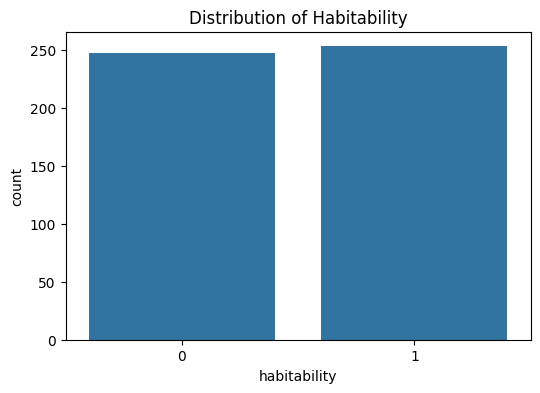

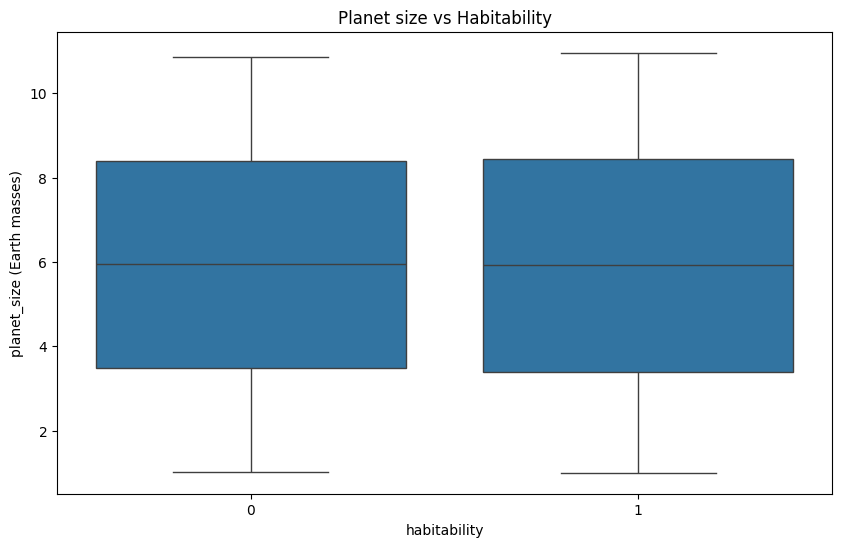

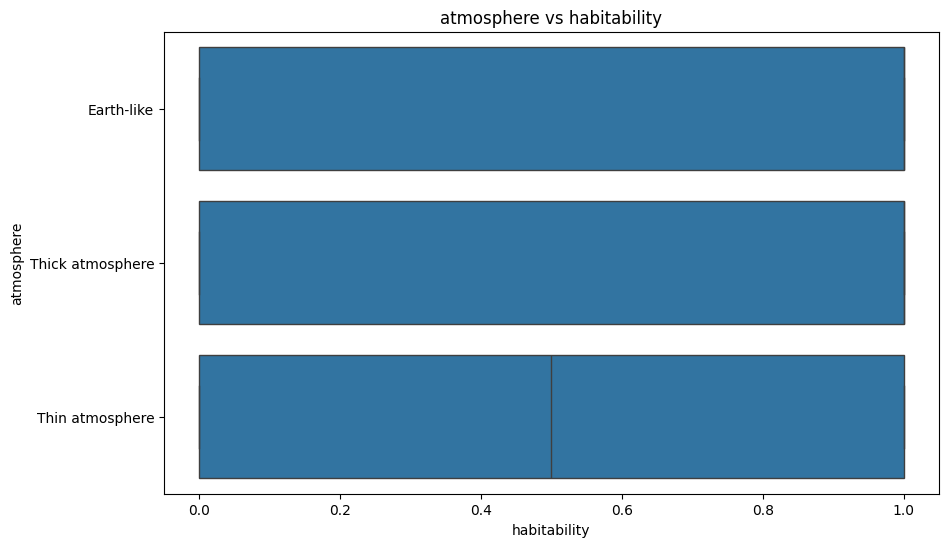

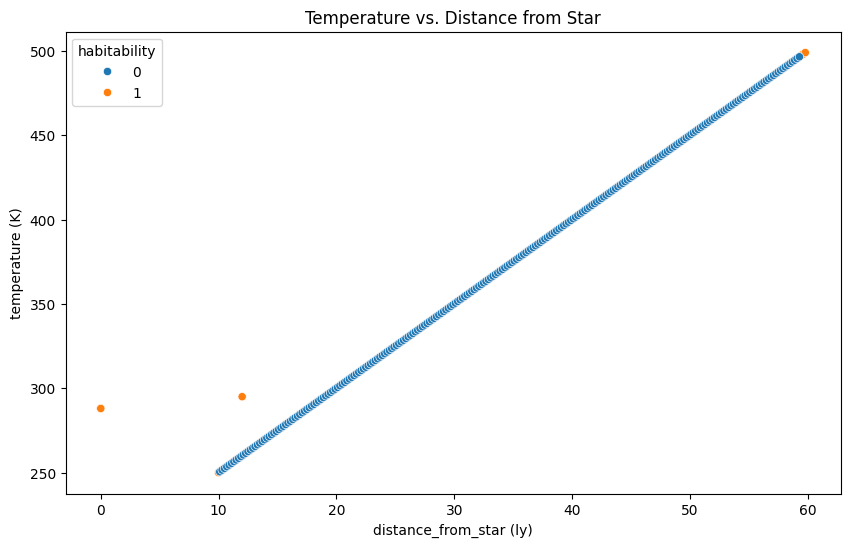

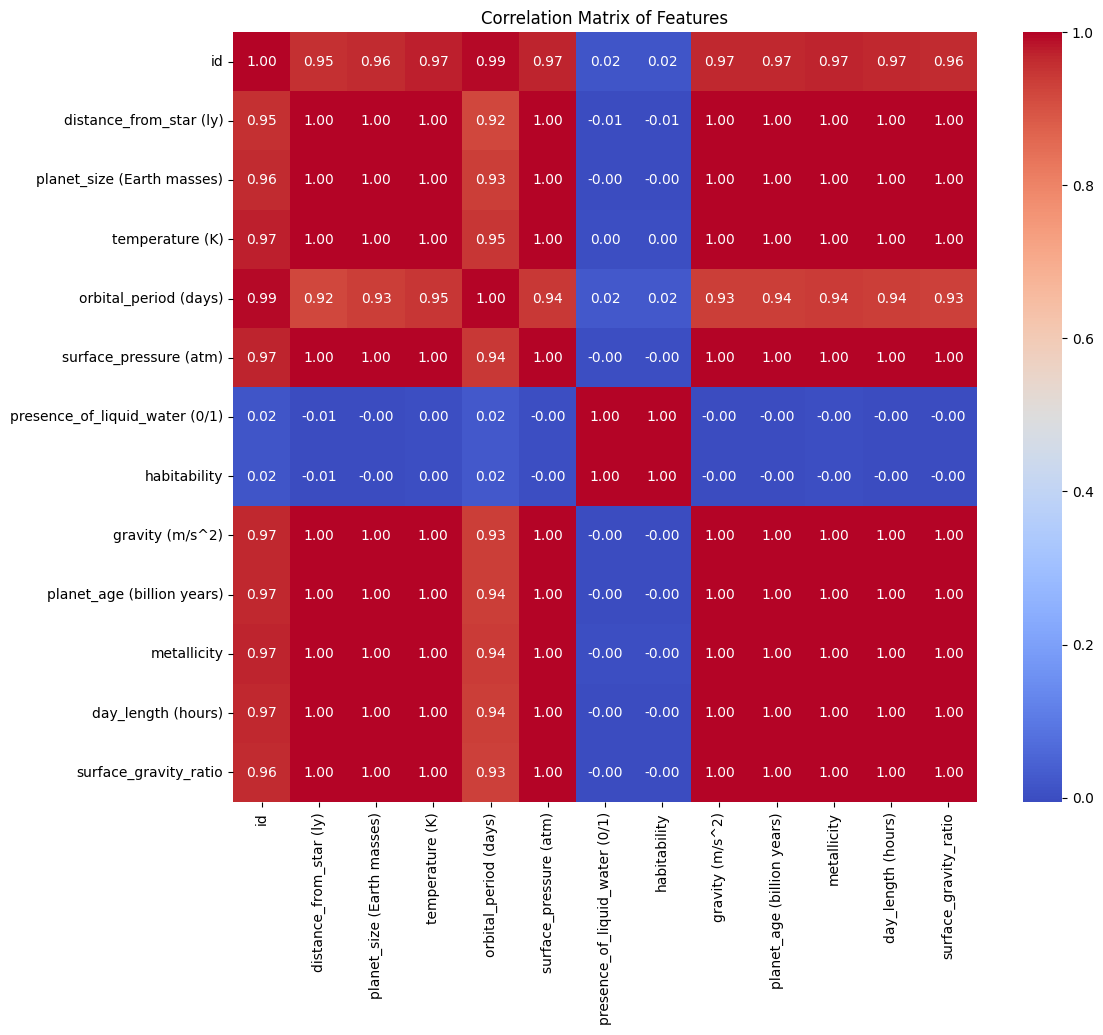

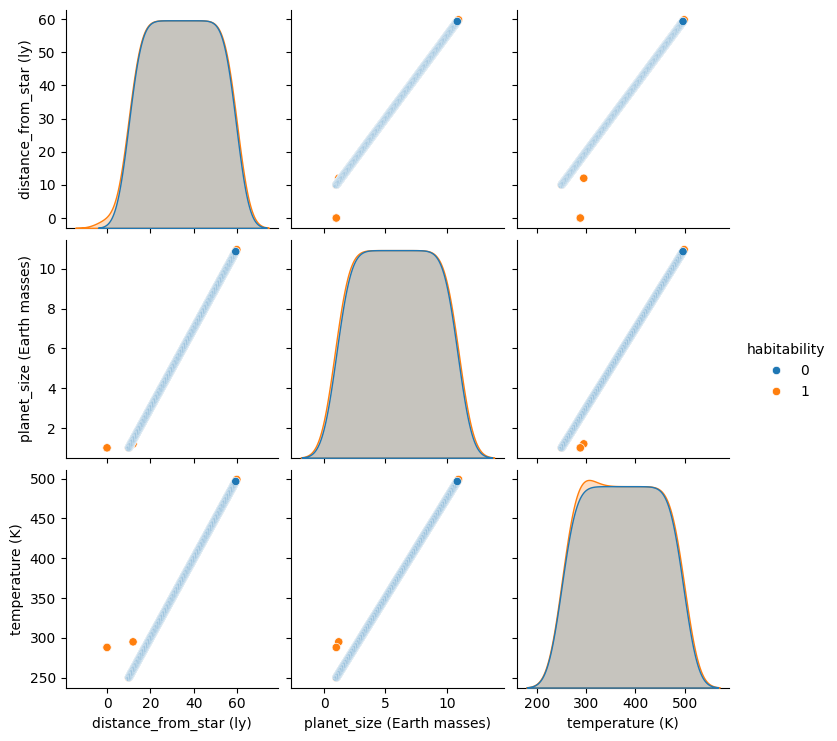

In [6]:
# Visualization

# 1. Distribution of Habitability
plt.figure(figsize=(6, 4))
sns.countplot(x='habitability', data=dataFrame)
plt.title('Distribution of Habitability')
plt.show()

# 2. Relationship between Planet Size and Habitability
plt.figure(figsize=(10, 6))
sns.boxplot(x='habitability', y='planet_size (Earth masses)', data=dataFrame) # Bisa coba di explore dengan mengubah nilai y
plt.title('Planet size vs Habitability')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='habitability', y='atmosphere', data=dataFrame) # Bisa coba di explore dengan mengubah nilai y
plt.title('atmosphere vs habitability')
plt.show()

# 3. Scatter plot of Temperature vs. Distance from Star, colored by habitability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_from_star (ly)', y='temperature (K)', hue='habitability', data=dataFrame)
plt.title('Temperature vs. Distance from Star')
plt.show()

# 4. Correlation Matrix Heatmap
numerical_data = dataFrame.select_dtypes(include=np.number)

# Calculate the correlation matrix using the numerical data
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# 5. Pairplot for selected features
selected_features = ['distance_from_star (ly)', 'planet_size (Earth masses)', 'temperature (K)', 'habitability']
sns.pairplot(dataFrame[selected_features], hue='habitability')
plt.show()

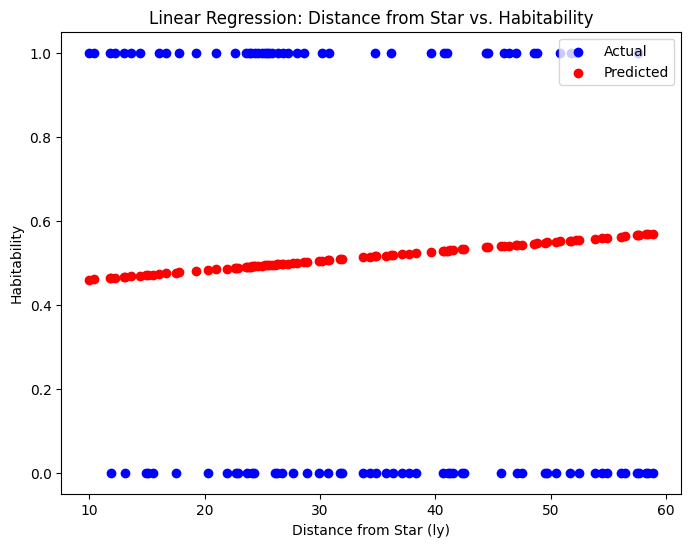

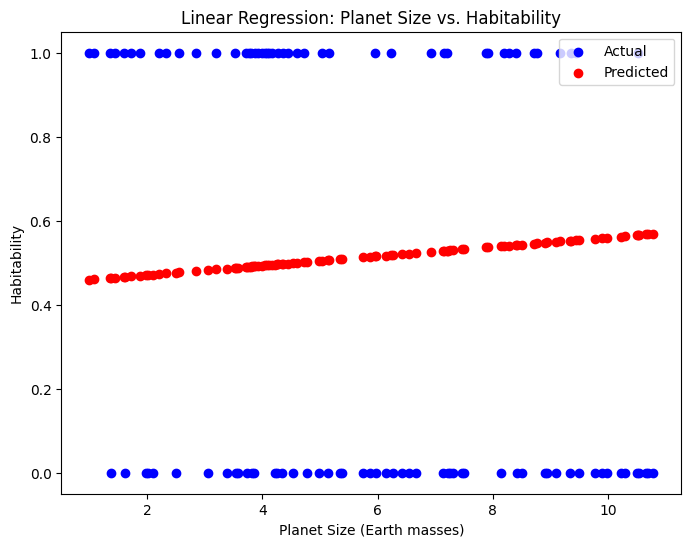

In [7]:
# Prepare data for linear regression analysis
xReg = regressionDataFrame[['distance_from_star (ly)', 'planet_size (Earth masses)']]
yReg = regressionDataFrame['habitability']

# Split the data into training and testing sets
x_trainReg, x_testReg, y_trainReg, y_testReg = train_test_split(xReg, yReg, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(x_trainReg, y_trainReg)

# Make predictions on the test set
y_predictionReg = model.predict(x_testReg)

plt.figure(figsize=(8, 6))
plt.scatter(x_testReg['distance_from_star (ly)'], y_testReg, color='blue', label='Actual')
plt.scatter(x_testReg['distance_from_star (ly)'], y_predictionReg, color='red', label='Predicted')
plt.xlabel('Distance from Star (ly)')
plt.ylabel('Habitability')
plt.title('Linear Regression: Distance from Star vs. Habitability')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(x_testReg['planet_size (Earth masses)'], y_testReg, color='blue', label='Actual')
plt.scatter(x_testReg['planet_size (Earth masses)'], y_predictionReg, color='red', label='Predicted')
plt.xlabel('Planet Size (Earth masses)')
plt.ylabel('Habitability')
plt.title('Linear Regression: Planet Size vs. Habitability')
plt.legend()
plt.show()

In [8]:
import pandas as pd
distanceFromStar = float(input("Enter the distance from the star (in l.y): "))
planetSize = float(input("Enter the planet size (Earth masses): "))
temperature = float(input("Enter the temperature (in K): "))

#create a dataframe for the user input
userInp = pd.DataFrame({'distance_from_star (ly)': [distanceFromStar],
                        'planet_size (Earth masses)': [planetSize],
                        'temperature (K)': [temperature]})

# Logistic Regression
linearPrediction = model.predict(userInp[['distance_from_star (ly)', 'planet_size (Earth masses)']])
print(f'Linear Regression Prediction: {linearPrediction[0]}')

# Logistic Regression
xLog = dataFrame[['distance_from_star (ly)', 'planet_size (Earth masses)', 'temperature (K)']] # Select only necessary columns
yLog = dataFrame[['habitability']]
x_trainLog, x_testLog, y_trainLog, y_testLog = train_test_split(xLog, yLog, test_size=0.2, random_state=42)
logModel = LogisticRegression()
logModel.fit(x_trainLog, y_trainLog)
logisticPrediction = logModel.predict(userInp)
print(f"Logistic Regression Prediction: {logisticPrediction[0]}")

# Random Forest
XRf = dataFrame[['distance_from_star (ly)', 'planet_size (Earth masses)', 'temperature (K)']]
yRf = dataFrame['habitability']
X_trainRf, X_testRf, y_trainRf, y_testRf = train_test_split(XRf, yRf, test_size=0.2, random_state=42)
rfModel = RandomForestClassifier(random_state=42)
rfModel.fit(X_trainRf, y_trainRf)

rfPrediction = rfModel.predict(userInp)
print(f"Random Forest Prediction: {rfPrediction[0]}")

# Feature Importance from Random Forest (for explanation)
featureImportance = rfModel.feature_importances_
featureName = ['distance_from_star (ly)', 'planet_size (Earth masses)', 'temperature (K)']

for i, importance in enumerate(featureImportance):
  print(f'Feature Importance of {featureName[i]}: {importance}')

Linear Regression Prediction: 0.8603671890429805
Logistic Regression Prediction: 1


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest Prediction: 1
Feature Importance of distance_from_star (ly): 0.33252951682114634
Feature Importance of planet_size (Earth masses): 0.3291186951399042
Feature Importance of temperature (K): 0.33835178803894944
